>>>>>>>> Handling missing values<<<<<<<<<<<

In [1]:
#import the packages and read the data 
import pandas as pd
import numpy as np

# read in all our data
df1 = pd.read_csv("/Users/pari/Downloads/dirty_file.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
# look at a few rows of the nfl_data file. I can see a handful of missing data already!
df1.sample(10)

,id,full_name,first_name,last_name,email,gender,age
11,12.0,Luz Lansdowne,Luz,Lansdowne,llansdowneb@theguardian.com,Female,16
10,11.0,Palm Domotor,Palm,Domotor,pdomotora@github.io,Male,6
21,NaN,Maurits Shawl,Maurits,Shawl,mshawlj@dmoz.org,Male,72
14,15.0,Eden Wace,Eden,Wace,ewacee@marriott.com,Female,16
20,21.0,Kerianne Goacher,Kerianne,Goacher,NaN,Female,45
1,2.0,Kenyon Possek,Kenyon,Possek,kpossek1@ucoz.com,Male,12
13,14.0,Stacee Bovis,Stacee,Bovis,sbovisd@webeden.co.uk,Female,22
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17.0,Tobias Sherburn,Tobias,Sherburn,tsherburnf@facebook.com,Male,2
8,9.0,Eunice Blakebrough,Eunice,Blakebrough,eblakebrough8@sohu.com,Female,45


In [3]:
missing_values_count = df1.isnull().sum()
missing_values_count[0:10]

id            3
full_name     2
first_name    2
last_name     2
email         3
gender        3
age           2
dtype: int64

In [4]:
# how many total missing values do we have?
total_cells = np.product(df1.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

10.559006211180124

In [5]:
#by looking at our data we have 2 rows that are completely without any data so we can remove these rows totally
df1.dropna()

,id,full_name,first_name,last_name,email,gender,age
0,1.0,Mariel Finnigan,Mariel,Finnigan,mfinnigan0@usda.gov,Female,60
1,2.0,Kenyon Possek,Kenyon,Possek,kpossek1@ucoz.com,Male,12
2,3.0,Lalo Manifould,Lalo,Manifould,lmanifould2@pbs.org,Male,26
3,4.0,Nickola Carous,Nickola,Carous,ncarous3@phoca.cz,Male,4
4,5.0,Norman Dubbin,Norman,Dubbin,ndubbin4@wikipedia.org,Male,17
6,7.0,Franz Castello,Franz,Castello,fcastello6@1688.com,Male,25
7,8.0,Jorge Tarney,Jorge,Tarney,jtarney7@ft.com,Male,77
8,9.0,Eunice Blakebrough,Eunice,Blakebrough,eblakebrough8@sohu.com,Female,45
9,10.0,Kristopher Frankcombe,Kristopher,Frankcombe,kfrankcombe9@slate.com,Male,old
10,11.0,Palm Domotor,Palm,Domotor,pdomotora@github.io,Male,6


In [6]:
# just how much data did we lose? #It dosent work! how can i find numbers of rows i lost?!!!!
print("rows in original dataset: %d \n" % df1.shape[1])
print("rows with na's dropped: %d" % df1.dropna().shape[1])

rows in original dataset: 7 

rows with na's dropped: 7


In [7]:
# remove all columns with at least one missing value
columns_with_na_dropped = df1.dropna(axis=1)
columns_with_na_dropped.head()
#Because we had 2 rows copmletely empty we lost all our columns

""
0
1
2
3
4


In [11]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % df1.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 7 

Columns with na's dropped: 0


In [12]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
df1.fillna(method = 'bfill', axis=0).fillna(0)

,id,full_name,first_name,last_name,email,gender,age
0,1.0,Mariel Finnigan,Mariel,Finnigan,mfinnigan0@usda.gov,Female,60
1,2.0,Kenyon Possek,Kenyon,Possek,kpossek1@ucoz.com,Male,12
2,3.0,Lalo Manifould,Lalo,Manifould,lmanifould2@pbs.org,Male,26
3,4.0,Nickola Carous,Nickola,Carous,ncarous3@phoca.cz,Male,4
4,5.0,Norman Dubbin,Norman,Dubbin,ndubbin4@wikipedia.org,Male,17
5,6.0,Hasty Perdue,Hasty,Perdue,hperdue5@qq.com,Male,77
6,7.0,Franz Castello,Franz,Castello,fcastello6@1688.com,Male,25
7,8.0,Jorge Tarney,Jorge,Tarney,jtarney7@ft.com,Male,77
8,9.0,Eunice Blakebrough,Eunice,Blakebrough,eblakebrough8@sohu.com,Female,45
9,10.0,Kristopher Frankcombe,Kristopher,Frankcombe,kfrankcombe9@slate.com,Male,old


In [17]:
#Drop the rows where all of the elements are nan
df1_with_na_dropped_rows = df1.dropna(axis=0, how='all') # 1 for column
df1_with_na_dropped_rows

,id,full_name,first_name,last_name,email,gender,age
0,1.0,Mariel Finnigan,Mariel,Finnigan,mfinnigan0@usda.gov,Female,60
1,2.0,Kenyon Possek,Kenyon,Possek,kpossek1@ucoz.com,Male,12
2,3.0,Lalo Manifould,Lalo,Manifould,lmanifould2@pbs.org,Male,26
3,4.0,Nickola Carous,Nickola,Carous,ncarous3@phoca.cz,Male,4
4,5.0,Norman Dubbin,Norman,Dubbin,ndubbin4@wikipedia.org,Male,17
5,6.0,Hasty Perdue,Hasty,Perdue,hperdue5@qq.com,NaN,77
6,7.0,Franz Castello,Franz,Castello,fcastello6@1688.com,Male,25
7,8.0,Jorge Tarney,Jorge,Tarney,jtarney7@ft.com,Male,77
8,9.0,Eunice Blakebrough,Eunice,Blakebrough,eblakebrough8@sohu.com,Female,45
9,10.0,Kristopher Frankcombe,Kristopher,Frankcombe,kfrankcombe9@slate.com,Male,old


In [18]:
#Fill the missing values automatically 
df1_with_na_dropped_rows

,id,full_name,first_name,last_name,email,gender,age
0,1.0,Mariel Finnigan,Mariel,Finnigan,mfinnigan0@usda.gov,Female,60
1,2.0,Kenyon Possek,Kenyon,Possek,kpossek1@ucoz.com,Male,12
2,3.0,Lalo Manifould,Lalo,Manifould,lmanifould2@pbs.org,Male,26
3,4.0,Nickola Carous,Nickola,Carous,ncarous3@phoca.cz,Male,4
4,5.0,Norman Dubbin,Norman,Dubbin,ndubbin4@wikipedia.org,Male,17
5,6.0,Hasty Perdue,Hasty,Perdue,hperdue5@qq.com,NaN,77
6,7.0,Franz Castello,Franz,Castello,fcastello6@1688.com,Male,25
7,8.0,Jorge Tarney,Jorge,Tarney,jtarney7@ft.com,Male,77
8,9.0,Eunice Blakebrough,Eunice,Blakebrough,eblakebrough8@sohu.com,Female,45
9,10.0,Kristopher Frankcombe,Kristopher,Frankcombe,kfrankcombe9@slate.com,Male,old


                           <<<<<<<<<< kaggel 1 Day <<<<<<<<<

In [21]:
import pandas as pd
import numpy as np
sf_permits = pd.read_csv("/Users/pari/Downloads/Building_Permits.csv")
sf_permits

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [22]:
sf_permits.sample(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
102155,201510149642,8,otc alterations permit,10/14/2015,0263,011,101,NaN,California,St,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Financial District/South Beach,94111.0,"(37.79294896659241, -122.39809861435491)",139922466081
165871,201701247745,8,otc alterations permit,01/24/2017,5703,024,449,NaN,Gates,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Bernal Heights,94110.0,"(37.73768756491143, -122.41386099910913)",1451074187244
181379,201709077218,8,otc alterations permit,09/07/2017,3550,001,1812,NaN,Harrison,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94103.0,"(37.768425157782545, -122.4137129961403)",1477882389546
28270,201310179602,8,otc alterations permit,10/17/2013,1162,009,2282,NaN,Golden Gate,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,1.0,Lone Mountain/USF,94118.0,"(37.77761955016398, -122.44844237640194)",1321218381831
103714,201510270891,8,otc alterations permit,10/27/2015,4591A,047,181,NaN,Cleo Rand,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,10.0,Bayview Hunters Point,94124.0,"(37.72894373321563, -122.37151235066692)",1400905173793
21693,201308144353,8,otc alterations permit,08/14/2013,1061,005,119,NaN,Palm,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Presidio Heights,94118.0,"(37.783304257972326, -122.45822475100142)",1314298239127
9289,201304104235,8,otc alterations permit,04/10/2013,0472,020,1490,NaN,Francisco,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Marina,94123.0,"(37.80278316360068, -122.42960014560947)",1301324302463
142128,201611092345,8,otc alterations permit,11/09/2016,5918,003,26,NaN,Hamilton,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Portola,94134.0,"(37.7300605805372, -122.41149597256026)",1443838191238
49086,M490527,8,otc alterations permit,05/23/2014,0643,003,1628,NaN,California,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,94109.0,"(37.79082846182862, -122.42118427229832)",1342995451735
194386,201801128575,3,additions alterations or repairs,01/12/2018,0804,018,726,NaN,Fillmore,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Hayes Valley,94117.0,"(37.776605106226974, -122.4310577399817)",1493481237174


In [23]:
# get the number of missing data points per column
missing_values_count = sf_permits.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64

In [24]:
# how many total missing values do we have?
total_cells = np.product(sf_permits.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

26.26002315058403

In [25]:
# remove all the rows that contain a missing value
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [26]:
# remove all columns with at least one missing value
columns_with_na_dropped = sf_permits.dropna(axis=1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [27]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


In [31]:
# get a small subset of the dataset
subset_sf_permits = sf_permits.loc[:, 'Permit Number':'Record ID'].head()
subset_sf_permits

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [32]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
subset_sf_permits.fillna(method = 'bfill', axis=0).fillna(0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0.0,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,0.0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0.0,Geary,St,...,3.0,constr type 3,1.0,constr type 1,0.0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,0.0,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,0.0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,0.0,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),0.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,0.0,Market,St,...,3.0,constr type 3,0.0,0,0.0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


                                  <<<<<<<<<< kaggel 2 Day <<<<<<<<<

In [33]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
#you have to install the package by running the following command in you terminal and try again:
#conda install mlxtend --channel conda-forge
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2018 = pd.read_csv("/Users/Pari/Downloads/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

In [34]:
kickstarters_2018 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [36]:
kickstarters_2018.shape

(378661, 15)

Text(0.5,1,'Scaled data')

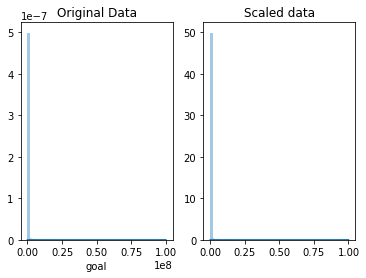

In [39]:
# select the usd_goal_real column
goal = kickstarters_2018.goal

# scale the goals from 0 to 1
scaled_data = minmax_scaling(goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2018.goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Text(0.5,1,'Normalized data')

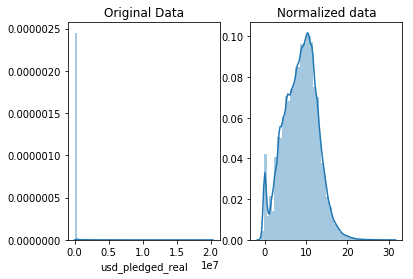

In [40]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2018.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2018.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")
#no it doesnt have same info ,some of pledged data points are higher than usd_pledged_read data points
#maybe those higher points are outliers.

                                 <<<<<<<<<< kaggel 3 Day <<<<<<<<<

In [41]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("/Users/pari/Downloads/earthquake_database.csv")
landslides = pd.read_csv("/Users/pari/Downloads/landslide_events.csv")
volcanos = pd.read_csv("/Users/pari/Downloads/volcanic_eruptions.csv")

# set seed for reproducibility
np.random.seed(0)

In [42]:
# print the first few rows of the date column
print(earthquakes['Date'].head())

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object


In [43]:
# check the data type of our date column
earthquakes['Date'].dtype

dtype('O')

In [45]:
# create a new column, date_parsed, with the parsed dates
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%Y")
#so it seems thay we have some data within our dataset in different format

ValueError: time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

In [46]:
#with infer_datetime_format , not always recommended 
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)
#or:
#looking through the dataset I find 3 different formats that I will change them in here
#reformating 'Date' for 3 Dates objects 
display(earthquakes.loc[[3378, 7512, 20650]])
earthquakes.loc[3378, 'Date']= '02/23/1975' 
earthquakes.loc[7512, 'Date']= '04/28/1985'
earthquakes.loc[20650, 'Date']= '03/13/2011' 
#display the results for those 3 Dates objects to make sure of new format
display(earthquakes.loc[[3378, 7512, 20650]])
#create new column Date_parsed , parsing new format of ['Date] to ['Date_parsed']
earthquakes['Date_parsed'] = pd.to_datetime(earthquakes['Date'],format = "%m/%d/%Y")
#earthquakes['Date'].head()  #Name: Date, dtype: object
earthquakes['Date_parsed'].head() #Name: Date_parsed, dtype: datetime64[ns]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,1975-02-23 02:58:41.000
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed,1985-04-28 02:53:41.530
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed,2011-03-13 02:23:34.520


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
3378,02/23/1975,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,1975-02-23 02:58:41.000
7512,04/28/1985,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed,1985-04-28 02:53:41.530
20650,03/13/2011,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed,2011-03-13 02:23:34.520


0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: Date_parsed, dtype: datetime64[ns]

In [47]:
# try to get the day of the month from the date column
#day_of_month_landslides = landslides['date'].dt.day

#it didnt work becouse dt.day words with dtype: datetime, not with object 
#and thats why we will use Date_parsed columns that we create parsed before # get the day of the month from the date_parsed column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
day_of_month_earthquakes.head()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64

In [48]:
# remove na's
day_of_month_earthquakes = earthquakes['Date_parsed'].dt.day
day_of_month_earthquakes.head()

0    2
1    4
2    5
3    8
4    9
Name: Date_parsed, dtype: int64

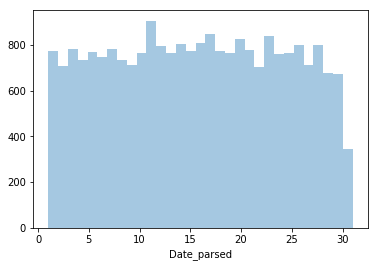

In [49]:
# remove na's
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

                            <<<<<<<<<< kaggel 4 Day <<<<<<<<<

In [50]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

In [51]:
#use @ sign instead of #.
str_before = "My Email adress is K.cooper#gmail.com"

type(str_before)

str

In [52]:
#encoding from str to ASCII :
ASCII_after = str_before.encode("ASCII", errors="replace")
ASCII_after

b'My Email adress is K.cooper#gmail.com'

In [53]:
type(ASCII_after)

bytes

In [54]:
#decoding to str:
print(ASCII_after.decode("ASCII")) 

My Email adress is K.cooper#gmail.com


In [56]:
# Your Turn! Trying to read in this file gives you an error. Figure out
# what the correct encoding should be and read in the file. :)
police_killings = pd.read_csv("/Users/pari/Downloads/PoliceKillingsUS.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 2: invalid start byte

In [57]:
# Useing Chardet function
with open("/Users/pari/Downloads/PoliceKillingsUS.csv", "rb") as YT_rawdata :
    YT_result = chardet.detect(YT_rawdata.read(10000))
    
print(YT_result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [58]:
#The type of file is ascii so I'll try ascii encoding:
police_killings = pd.read_csv("/Users/pari/Downloads/PoliceKillingsUS.csv", encoding='ASCII')

#read first few lines of data :
police_killings.head()

UnicodeDecodeError: 'ascii' codec can't decode byte 0x96 in position 2: ordinal not in range(128)

In [59]:
#The chardet module didnt detect the right encodying,I will try Windows-1252:

police_killings = pd.read_csv("/Users/pari/Downloads/PoliceKillingsUS.csv", encoding="Windows-1252")

police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [60]:
#It is the right encoding for the file 
#I will try UTF-8 too!

police_killings = pd.read_csv("PoliceKillingsUS.csv", encoding="UTF-8")

police_killings.head()

FileNotFoundError: File b'PoliceKillingsUS.csv' does not exist

In [62]:
## Your turn! Save out a version of the police_killings dataset with UTF-8 encoding 
police_killings.to_csv("/Users/pari/Downloads/police_killings-utf8.csv")

                              <<<<<<<<<< kaggel 5 Day <<<<<<<<<

In [63]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
#conda install -c conda-forge fuzzywuzzy 
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
np.random.seed(0)

In [64]:
# look at the first ten thousand bytes to guess the character encoding
with open("/Users/pari/Downloads/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [74]:
#we will clean up the City column 
#get all the unique values im the 'City' column
cities = suicide_attacks['City'].unique()


#sort them alphabetically and check if there is inconsistent data entry :
cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D.G Khan',
       'D.G Khan ', 'Dara Adam Khel', 'Dara Adam khel', 'Fateh Jang',
       'Ghallanai, Mohmand Agency ', 'Gujrat', 'Hangu', 'Haripur',
       'Hayatabad', 'Islamabad', 'Islamabad ', 'Jacobabad',
       'KURRAM AGENCY', 'Karachi', 'Karachi ', 'Karak', 'Khanewal',
       'Khuzdar', 'Khyber Agency', 'Khyber Agency ', 'Kohat', 'Kohat ',
       'Kuram Agency ', 'Lahore', 'Lahore ', 'Lakki Marwat',
       'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN', 'Malakand ',
       'Mansehra', 'Mardan', 'Mohmand Agency', 'Mohmand Agency ',
       'Mohmand agency', 'Mosal Kor, Mohmand Agency', 'Multan',
       'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town', 'Shabqadar-Charsadda', 'Shangla ', 'S

In [75]:
#converting all data to lowercases and remove the spaces :
suicide_attacks['City'] = suicide_attacks['City'].str.lower()

#remove the trailing white spaces :
suicide_attacks['City'] = suicide_attacks['City'].str.strip()

#check the first few rows:
suicide_attacks['City'].head()

0    islamabad
1      karachi
2      karachi
3      karachi
4       quetta
Name: City, dtype: object

In [65]:
suicide_attacks = pd.read_csv("/Users/pari/Downloads/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 
                              encoding='Windows-1252')

In [66]:
# Your turn! Take a look at all the unique values in the "Province" column. 
# Then convert the column to lowercase and remove any trailing white spaces

Province = suicide_attacks['Province'].unique()
Province.sort()
Province

array(['AJK', 'Balochistan', 'Baluchistan', 'Capital', 'FATA', 'Fata',
       'KPK', 'Punjab', 'Sindh'], dtype=object)

In [67]:
#There are inconsistencies "FATA" , "Fata"(same)
#and "Balochistan" , "Baluchistan"

#convert the Province column to lower case :
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()

#remove the trailing white spaces (if exist)
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()

suicide_attacks['Province'].unique()

array(['capital', 'sindh', 'baluchistan', 'punjab', 'fata', 'kpk', 'ajk',
       'balochistan'], dtype=object)

In [68]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

In [69]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("d.i khan", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('D. I Khan', 100),
 ('D.I Khan', 100),
 ('D.I Khan ', 100),
 ('D.G Khan', 88),
 ('D.G Khan ', 88),
 ('Khanewal', 50),
 ('Sudhanoti', 47),
 ('Hangu', 46),
 ('Kohat', 46),
 ('Kohat ', 46)]

In [70]:
#write a function :

# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string

def replace_matches_in_column(df, column, string_to_match,min_ratio=90):
    #get the list of unique string 
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match,strings,limit=10,
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    #get only the matches for ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    
    #get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    
    #replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    #test if the function is working :
    print("done!")

In [71]:
## use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=suicide_attacks,column = 'City', string_to_match='d.i khan')

done!


In [78]:
#we can use the same function to replace but first lets get the 
#most 10 closest match to 'kurram agency'
matches2 = fuzzywuzzy.process.extract("kurram agency", cities,limit=10
                        ,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches2

[('KURRAM AGENCY', 100),
 ('Kuram Agency ', 96),
 ('Bajaur Agency', 69),
 ('Khyber Agency', 69),
 ('Khyber Agency ', 69),
 ('Orakzai Agency', 67),
 ('Mohmand Agency', 59),
 ('Mohmand Agency ', 59),
 ('Mohmand agency', 59),
 ('Mosal Kor, Mohmand Agency', 59)]

In [79]:
replace_matches_in_column(df=suicide_attacks, column='City', string_to_match='kurram agency')

done!


In [80]:
#now lets check again if the changes is reflected :
cities = suicide_attacks['City'].unique()

cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.g khan', 'd.i khan', 'dara adam khel',
       'fateh jang', 'ghallanai, mohmand agency', 'gujrat', 'hangu',
       'haripur', 'hayatabad', 'islamabad', 'jacobabad', 'karachi',
       'karak', 'khanewal', 'khuzdar', 'khyber agency', 'kohat',
       'kurram agency', 'lahore', 'lakki marwat', 'lasbela', 'lower dir',
       'malakand', 'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)